XGBOOST MODEL
>
A RANDOM SAMPLE OF 5000 ROWS OR COMPOUNDS ARE SELECTED FROM THE INACTIVE CLASS FOR MODEL BUILDING
>
No further undersampling is done 

IMPORTING LIBRARIES AND DATA

In [1]:
# the big three
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# training algorithms
import xgboost as xgb

# resampling algorithms
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# importing other libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler

# importing metrics 
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix, roc_curve, auc

In [2]:
# read dataset into dataframe
df = pd.read_csv("../../data/final.csv")
df.head()

,D001,D002,D003,D004,D005,D006,D007,D008,D009,D010,...,D769,D770,D771,D772,D773,D774,D775,D776,D777,Activity
0,2,0,0,1,4,0,0,0,0,0,...,0,1,0,0,0,5.45943,-0.367670,0.363636,4.29650,0
1,1,0,0,2,1,0,0,0,0,0,...,0,1,0,0,0,5.08746,-0.772128,0.240000,2.31134,0
2,1,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,4.70044,-0.295978,0.300000,1.67610,0
3,2,0,0,1,3,0,0,0,0,0,...,0,1,1,0,0,5.49185,-0.357977,0.352941,2.63932,0
4,1,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,4.64386,-0.274183,0.315789,1.41996,0


In [3]:
# checking dimension of dataset
df.shape

(195244, 778)

In [4]:
# checking distribution of actives and inactives in dataset
df.Activity.value_counts()

0    194888
1       356
Name: Activity, dtype: int64

In [5]:
# creating new dataframes for active class and inactive class
df_0 = df.query("Activity == 0")
df_1 = df.query("Activity == 1")
len(df_0), len(df_1)

(194888, 356)

In [6]:
# randomly selecting 5000 active compounds from the inactive data
df_0 = df_0.sample(5000, random_state=36)
df_0

,D001,D002,D003,D004,D005,D006,D007,D008,D009,D010,...,D769,D770,D771,D772,D773,D774,D775,D776,D777,Activity
89752,2,0,0,1,2,0,0,0,0,0,...,0,1,0,0,0,5.52356,-0.729299,0.333333,2.459540,0
72981,1,0,0,1,2,0,0,0,0,0,...,0,1,0,0,0,5.16993,-0.684380,0.214286,1.684200,0
108108,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,5.00000,-0.686336,0.250000,0.399401,0
10253,3,0,0,2,3,0,0,0,0,0,...,0,0,0,0,0,5.78136,-0.464444,0.409091,4.691270,0
134734,3,0,0,0,4,0,0,0,0,0,...,0,1,0,0,1,5.52356,-0.785198,0.562500,3.469250,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163659,2,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,5.00000,-0.686336,0.500000,2.842840,0
95091,2,0,0,0,2,0,0,0,0,0,...,0,1,0,0,0,4.85798,-0.844243,0.545455,4.362100,0
178007,1,0,0,1,3,0,0,0,0,0,...,0,0,0,0,0,5.28540,-0.759346,0.181818,2.016000,0
98418,1,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,4.95420,-0.772128,0.240000,3.342630,0


In [7]:
# combining active data to inactive data to form complete dataframe for model training and testing

df = pd.concat([df_0, df_1], ignore_index=True)
df

,D001,D002,D003,D004,D005,D006,D007,D008,D009,D010,...,D769,D770,D771,D772,D773,D774,D775,D776,D777,Activity
0,2,0,0,1,2,0,0,0,0,0,...,0,1,0,0,0,5.52356,-0.729299,0.333333,2.459540,0
1,1,0,0,1,2,0,0,0,0,0,...,0,1,0,0,0,5.16993,-0.684380,0.214286,1.684200,0
2,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,5.00000,-0.686336,0.250000,0.399401,0
3,3,0,0,2,3,0,0,0,0,0,...,0,0,0,0,0,5.78136,-0.464444,0.409091,4.691270,0
4,3,0,0,0,4,0,0,0,0,0,...,0,1,0,0,1,5.52356,-0.785198,0.562500,3.469250,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5351,2,0,0,1,3,0,0,0,0,0,...,0,0,0,0,0,5.24800,-0.798000,0.414000,3.011000,1
5352,2,0,0,1,3,0,0,0,0,0,...,0,0,0,0,0,5.20900,-0.790000,0.429000,2.788000,1
5353,1,0,0,0,4,0,0,0,0,0,...,0,0,0,0,0,4.90700,-0.717000,0.240000,3.179000,1
5354,3,0,0,1,4,0,0,0,0,0,...,0,0,0,0,0,5.55500,-0.767000,0.514000,4.465000,1


There are 5356 rows which is equal to 5000 and 356 actives. We will now use SMOTE to oversample the minority class, the actives to 5,000 before model building

In [8]:
# divide dataframe into features, X and target y
X = df.drop(['Activity'],axis=1)
y = df['Activity']

# checking class distribution
print(y.value_counts())

0    5000
1     356
Name: Activity, dtype: int64


DIVIDING INTO TRAIN AND TEST DATASET

In [9]:
# dividing datasets into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# checking dimensions of train and test dataset
print("The training and test data have the following dimensions:\n{}{}".format(X_train.shape, X_test.shape))

# checking class distribution of train dataset
print("The class distribution of the train data:\n{}".format(y_train.value_counts()))

The training and test data have the following dimensions:
(4284, 777)(1072, 777)
The class distribution of the train data:
0    4000
1     284
Name: Activity, dtype: int64


HANDLING DATA FOR PREDICTION
>
In this section, the number of rows in the data for prediction is reduced to equal the number of rows of data that was used in the training

In [10]:
# reading the prediction dataset

df_pred = pd.read_csv("../../data/new.csv")
df_pred.head(5)

,ReadIn_ID,USER_ID,USER_ID_2,D001,D002,D003,D004,D005,D006,D007,...,D768,D769,D770,D771,D772,D773,D774,D775,D776,D777
0,2011,M652-0486,"N~1~-(2,3-dihydro-1,4-benzodioxin-6-yl)-2-[9-m...",1,0,0,1,4,0,0,...,0,0,0,0,0,0,5.42626,-0.648642,0.181818,0.498807
1,2141,L258-0120,1-(5-chloro-2-methylphenyl)-3-{2-[1-(4-methylb...,2,0,0,0,3,0,0,...,0,0,0,0,0,0,5.35755,-0.726331,0.375000,2.810180
2,2010,L834-0670,"4-ethyl-6-{5-[(4-fluorophenoxy)methyl]-1,2,4-o...",2,0,0,1,3,0,0,...,0,0,0,0,0,0,5.28540,-0.696023,0.400000,2.897260
3,2140,L258-0113,1-(2-chloro-4-methylphenyl)-3-{2-[1-(4-methylb...,2,0,0,0,3,0,0,...,0,0,0,0,0,0,5.35755,-0.726331,0.375000,2.810180
4,2009,L834-0614,"6-{5-[(4-chlorophenoxy)methyl]-1,2,4-oxadiazol...",2,0,0,1,3,0,0,...,0,0,0,0,0,0,5.28540,-0.696023,0.400000,3.010430


In [11]:
# Removing columns not needed for training
df_pred.drop(['ReadIn_ID', 'USER_ID_2'], axis = 1, inplace = True)

In [12]:
# Making the ID the index
df_pred = df_pred.set_index('USER_ID')
df_pred.head(5)

,D001,D002,D003,D004,D005,D006,D007,D008,D009,D010,...,D768,D769,D770,D771,D772,D773,D774,D775,D776,D777
USER_ID,,,,,,,,,,,,,,,,,,,,,
M652-0486,1,0,0,1,4,0,0,0,0,0,...,0,0,0,0,0,0,5.42626,-0.648642,0.181818,0.498807
L258-0120,2,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,5.35755,-0.726331,0.375000,2.810180
L834-0670,2,0,0,1,3,0,0,0,0,0,...,0,0,0,0,0,0,5.28540,-0.696023,0.400000,2.897260
L258-0113,2,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,5.35755,-0.726331,0.375000,2.810180
L834-0614,2,0,0,1,3,0,0,0,0,0,...,0,0,0,0,0,0,5.28540,-0.696023,0.400000,3.010430


In [13]:
# checking dimension of dataset
X_train.shape, df_pred.shape

((4284, 777), (36711, 777))

REMOVING LOW VARIANCE FEATURES
>
The variance threshold function will remove columns that dont meet a certain threshold. This is done to improve model performance
>
There are two different thresholds for this. Use the second one only when MinMaxScalar was used. You can use only one threshold

In [14]:
vt = VarianceThreshold(threshold=(.8 * (1 - .8)))

# Fit
_ = vt.fit(X_train)

# Get the mask
mask = vt.get_support()

# Subset the DataFrame
X_train = X_train.loc[:, mask]
X_test = X_test.loc[:, mask]

# Subset the dataset for predictions
df_p = df_pred.loc[:, mask]

In [15]:
X_train.shape, X_test.shape, df_pred.shape, df_p.shape

((4284, 356), (1072, 356), (36711, 777), (36711, 356))

In [16]:
# checking the distribution of the activity column of the test dataset

y_test.value_counts()

0    1000
1      72
Name: Activity, dtype: int64

The number of rows in the dataset remain the same however the number of columns have reduced

XGBOOST MODEL TRAINING
> 
For this section, the model is trained on either unsampled data or resampled data.

RESAMPLING USING SMOTE
> 
The dataset is resampled using SMOTE to obtain a active:inactive ratio of 1:1
>
> 
**THIS STEP SHOULD BE SKIPPED IF NO RESAMPLING WILL BE DONE**

OVERSMAPLING WITH SMOTE

In [17]:
# over = SMOTE(sampling_strategy=1, random_state=85)
# X_train, y_train = over.fit_resample(X_train, y_train)

# checking class distribution on resampled dataset
print(y_train.value_counts())

0    4000
1     284
Name: Activity, dtype: int64


The dataset is still inbalanced 

TRAINING MODELS

In [29]:
# estimate the scale_pos_weight value
from collections import Counter

counter = Counter(y_train)
estimate = counter[0]/counter[1]
estimate

14.084507042253522

In [30]:
# creating model object
clf = xgb.XGBClassifier(scale_pos_weight = 14)

# training model
clf.fit(X_train, y_train)

c:\Users\Cyril\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:49:14] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=14, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

PREDICTIONS

In [31]:
# predicting on train dataset
train_predictions = clf.predict(X_train)    

# predicting on test dataset
test_predictions = clf.predict(X_test)

If the performance of the model on the training dataset is significantly better than the performance on the test dataset, then the model may have overfit the training dataset.

CHECKING METRICS
> 
The metrics will be checked for both the training data and the tes dataset
> 
For the confusion matrix: <br>
> 
True Negative (Top-Left Quadrant)<br>
False Positive (Top-Right Quadrant)<br>
False Negative (Bottom-Left Quadrant)<br>
True Positive (Bottom-Right Quadrant)<br>

TRAINING DATA

Accuracy Score:  1.0
Precision Score:  1.0
Recall Score:  1.0
F1 Score:  1.0
MCC:  1.0
AUROC:  1.0


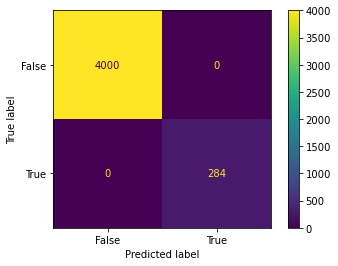

In [32]:
accuracy_test = accuracy_score(y_train, train_predictions)
precision = precision_score(y_train, train_predictions)
recall = recall_score(y_train, train_predictions)
f1 = f1_score(y_train, train_predictions)
mcc = matthews_corrcoef(y_train, train_predictions)

pred_prob = clf.predict_proba(X_train)[:,1]
auroc = roc_auc_score(y_train, pred_prob)                   

print("Accuracy Score: ", accuracy_test)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("F1 Score: ", f1)
print("MCC: ", mcc)
print("AUROC: ", auroc)

cm = confusion_matrix(y_train, train_predictions)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

TEST DATA

Accuracy Score:  0.9897388059701493
Precision Score:  0.9692307692307692
Recall Score:  0.875
F1 Score:  0.9197080291970802
MCC:  0.9156069452672795
AUROC:  0.9989027777777778


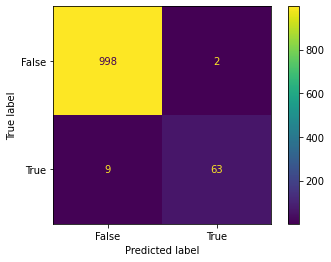

In [33]:
accuracy_test = accuracy_score(y_test, test_predictions)
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)

pred_prob = clf.predict_proba(X_test)
auroc = roc_auc_score(y_test, pred_prob[:,1])

print("Accuracy Score: ", accuracy_test)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("F1 Score: ", f1)
print("MCC: ", mcc)
print("AUROC: ", auroc)

cm = confusion_matrix(y_test, test_predictions)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

PLOTTING THE AUROC CURVE
> 
This is done for only the test data

In [43]:
pred_prob[:, 1]

array([9.9863714e-01, 1.8929715e-05, 2.3366471e-03, ..., 4.2908313e-03,
       1.2664727e-03, 4.4458273e-05], dtype=float32)

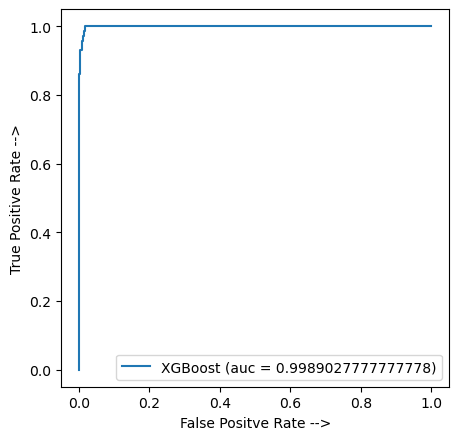

In [40]:
fpr, tpr, threshold = roc_curve(y_test, pred_prob[:, 1], pos_label=1)
auc_score = auc(fpr, tpr)

plt.figure(figsize = (5, 5), dpi = 100)
plt.plot(fpr, tpr, label = 'XGBoost (auc = {})' .format(auc_score))
plt.xlabel('False Positve Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()
plt.show()

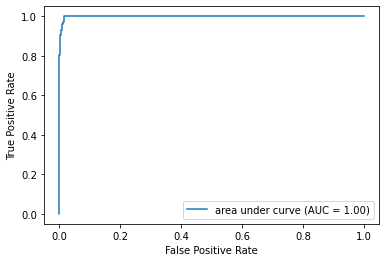

In [41]:
from sklearn.metrics import RocCurveDisplay

display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc= auc_score, estimator_name='area under curve')
display.plot()
plt.show()

Is the curve consistent to the auroc value obtained previously

Performing predictions on new datasets to find new actives

In [35]:
check = clf.predict(df_p)

In [36]:
1 in check

True

In [37]:
np.bincount(check)

array([36699,    12], dtype=int64)

In [38]:
result = np.where(check == 1)
result

(array([ 3479,  3679,  7938, 16414, 16745, 18809, 20740, 24817, 27532,
        27640, 27642, 35317], dtype=int64),)

In [27]:
ui = np.array([4831,  7938, 19071, 21173, 23490, 27642, 28882, 32380, 33429,
        34566, 35102])

In [28]:
# writing model training (and testing) dataset to a csv file
df.to_csv('selected_5000_xgb.csv', index = False)

In [29]:
# writing active compounds to a csv file
df_pred.reset_index(inplace = True)
df_pred.iloc[ui, :].to_csv('predicted_actives_xgb.csv', index = False)

Saving model to joblib file

In [30]:
import joblib

In [31]:
joblib.dump(clf, 'xgb_5_joblib')

['xgb_5_joblib']

Loading model

In [33]:
mj = joblib.load('xgb_5_joblib')

In [34]:
d = mj.predict(df_p)
np.bincount(d)

array([36700,    11], dtype=int64)